In [4]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
forwarded symbol: A
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: InputLayer
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: T
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_base
forwarded symbol: q_base
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_impl
forwarded symbol: runner_impl


# My models

## 20-20-20
Try the model that has shape (20, 20, 20).

In [6]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('Acrobot-v1'))
qfunc = qfunc_impl.DQN(
    model=qfunc_impl.CreateSingleModelWithRMSProp(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(20, 20, 20)),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

In [11]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[13:29:00] q_base.py:415 Episode 0/500: episode_total_reward = -75.00, episode_steps=75
[13:45:33] q_base.py:417 Episode 100/500: episode_total_reward = -130.00, episode_steps=130
[14:01:57] q_base.py:417 Episode 200/500: episode_total_reward = -103.00, episode_steps=103
[14:18:12] q_base.py:417 Episode 300/500: episode_total_reward = -77.00, episode_steps=77
[14:34:29] q_base.py:417 Episode 400/500: episode_total_reward = -83.00, episode_steps=83
CPU times: user 1h 22min 13s, sys: 10.8 s, total: 1h 22min 24s
Wall time: 1h 22min 39s


In [12]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[14:51:42] q_base.py:415 Episode 0/500: episode_total_reward = -98.00, episode_steps=98
[15:06:57] q_base.py:417 Episode 100/500: episode_total_reward = -77.00, episode_steps=77
[15:22:52] q_base.py:417 Episode 200/500: episode_total_reward = -64.00, episode_steps=64
[15:39:18] q_base.py:417 Episode 300/500: episode_total_reward = -102.00, episode_steps=102
[15:55:14] q_base.py:417 Episode 400/500: episode_total_reward = -104.00, episode_steps=104
CPU times: user 1h 19min 52s, sys: 7.55 s, total: 1h 20min
Wall time: 1h 20min 13s


In [13]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[16:11:54] q_base.py:415 Episode 0/500: episode_total_reward = -95.00, episode_steps=95
[16:28:23] q_base.py:417 Episode 100/500: episode_total_reward = -90.00, episode_steps=90
[16:44:56] q_base.py:417 Episode 200/500: episode_total_reward = -76.00, episode_steps=76
[17:01:41] q_base.py:417 Episode 300/500: episode_total_reward = -83.00, episode_steps=83
[17:18:32] q_base.py:417 Episode 400/500: episode_total_reward = -86.00, episode_steps=86
CPU times: user 1h 22min 30s, sys: 19.1 s, total: 1h 22min 49s
Wall time: 1h 23min 13s


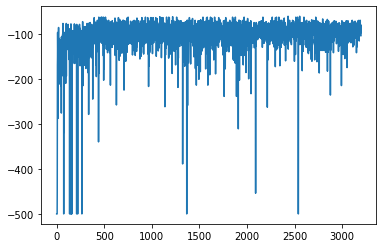

CPU times: user 15min 51s, sys: 5.32 s, total: 15min 56s
Wall time: 16min 8s


In [14]:
%%time
# Test
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

In [15]:
qfunc.SaveModel('saved_models/acrobot_v1_shape_20-20-20_rmsprop_gamma_0.99.model')